In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor)
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans
from sklearn.utils import resample
from sklearn.ensemble import AdaBoostClassifier
from ds_utils.unsupervised import plot_cluster_cardinality, plot_cluster_magnitude, plot_magnitude_vs_cardinality
from scipy.spatial.distance import euclidean
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
from catboost import CatBoostClassifier
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.decomposition import PCA
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
from imblearn.over_sampling import SMOTE
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from numpy import mean
from matplotlib import pyplot
from scipy.spatial.distance import euclidean
from sklearn.ensemble import RandomForestClassifier
from ds_utils.unsupervised import plot_loss_vs_cluster_number
from imblearn.pipeline import Pipeline
import matplotlib as mpl
from cycler import cycler
from sklearn.model_selection import ShuffleSplit
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve 
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV

In [2]:
df=pd.read_csv('Loan_data.csv')

C:\Users\asus\AppData\Local\Temp\ipykernel_4792\140937924.py:1: DtypeWarning: Columns (0,49) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('Loan_data.csv')


In [3]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,1077501,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,NaN,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,NaN,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,NaN,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,NaN,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(42536, 151)

In [5]:
#Dane zawierają 42536 obserwacji i 151 kolumn - łącznie z kolumną ze statusem pożyczki (zmienna objaśniana)

In [6]:
df.dtypes

id                        object
member_id                float64
loan_amnt                float64
funded_amnt              float64
funded_amnt_inv          float64
                          ...   
settlement_status         object
settlement_date           object
settlement_amount        float64
settlement_percentage    float64
settlement_term          float64
Length: 151, dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42536 entries, 0 to 42535
Columns: 151 entries, id to settlement_term
dtypes: float64(120), object(31)
memory usage: 49.0+ MB


In [8]:
df.keys()

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=151)

In [9]:
df.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,...,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,42535.000000,42535.000000,42535.000000,42535.000000,4.253100e+04,42535.000000,42506.000000,42535.000000,42535.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,160.000000,160.000000,160.000000
mean,NaN,11089.722581,10821.585753,10139.938785,322.623063,6.913656e+04,13.373043,0.152449,713.052545,717.052545,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4272.137875,49.905875,1.200000
std,NaN,7410.938391,7146.914675,7131.598014,208.927216,6.409635e+04,6.726315,0.512406,36.188439,36.188439,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3119.373774,15.563690,4.085255
min,NaN,500.000000,500.000000,0.000000,15.670000,1.896000e+03,0.000000,0.000000,610.000000,614.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,193.290000,10.690000,0.000000
25%,NaN,5200.000000,5000.000000,4950.000000,165.520000,4.000000e+04,8.200000,0.000000,685.000000,689.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1842.750000,40.000000,0.000000
50%,NaN,9700.000000,9600.000000,8500.000000,277.690000,5.900000e+04,13.470000,0.000000,710.000000,714.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3499.350000,49.970000,0.000000
75%,NaN,15000.000000,15000.000000,14000.000000,428.180000,8.250000e+04,18.680000,0.000000,740.000000,744.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5701.100000,60.652500,0.000000
max,NaN,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,13.000000,825.000000,829.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14798.200000,92.740000,24.000000


In [10]:
#Importuję opis zmiennych 
df_description = pd.read_csv('LCDataDictionary.csv')

In [11]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 151)
pd.set_option('display.max_colwidth', 2000)
pd.set_option('max_colwidth', 2000)
pd.options.display.float_format = '{:.3f}'.format

In [12]:
df_description[['LoanStatNew', 'Description']]

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.
5,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
6,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/credit limit for all bankcard accounts.


### Sprawdzam brakujące wartości

In [13]:
df.isna().sum()

id                                                0
member_id                                     42536
loan_amnt                                         1
funded_amnt                                       1
funded_amnt_inv                                   1
term                                              1
int_rate                                          1
installment                                       1
grade                                             1
sub_grade                                         1
emp_title                                      2627
emp_length                                     1113
home_ownership                                    1
annual_inc                                        5
verification_status                               1
issue_d                                           1
loan_status                                       1
pymnt_plan                                        1
url                                               1
desc        

In [14]:
#Sprawdzam i usuwam kolumny w 100% z nan

In [15]:
nan_cols = [i for i in df.columns if df[i].isnull().all()]

In [16]:
nan_cols

['member_id',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'tot_hi_cred_li

In [17]:
df.drop(
['member_id',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'tot_hi_cred_lim',
 'total_bal_ex_mort',
 'total_bc_limit',
 'total_il_high_credit_limit',
 'revol_bal_joint',
 'sec_app_fico_range_low',
 'sec_app_fico_range_high',
 'sec_app_earliest_cr_line',
 'sec_app_inq_last_6mths',
 'sec_app_mort_acc',
 'sec_app_open_acc',
 'sec_app_revol_util',
 'sec_app_open_act_il',
 'sec_app_num_rev_accts',
 'sec_app_chargeoff_within_12_mths',
 'sec_app_collections_12_mths_ex_med',
 'sec_app_mths_since_last_major_derog',
 'hardship_type',
 'hardship_reason',
 'hardship_status',
 'deferral_term',
 'hardship_amount',
 'hardship_start_date',
 'hardship_end_date',
 'payment_plan_start_date',
 'hardship_length',
 'hardship_dpd',
 'hardship_loan_status',
 'orig_projected_additional_accrued_interest',
 'hardship_payoff_balance_amount',
 'hardship_last_payment_amount'], 
axis=1, inplace=True)

In [18]:
#Usuwam kolumny, które zawierają nan w 85% 

In [19]:
nan_cols85 = [i for i in df.columns if df[i].isnull().sum() > 0.85*len(df)]

In [20]:
nan_cols85

['mths_since_last_record',
 'next_pymnt_d',
 'debt_settlement_flag_date',
 'settlement_status',
 'settlement_date',
 'settlement_amount',
 'settlement_percentage',
 'settlement_term']

In [21]:
df.drop(
['mths_since_last_record',
 'next_pymnt_d',
 'debt_settlement_flag_date',
 'settlement_status',
 'settlement_date',
 'settlement_amount',
 'settlement_percentage',
 'settlement_term'],
axis=1, inplace=True)

In [22]:
#Usunięcie kolumn ze zbędnymi informacjami

In [23]:
df.drop(
['url', 
 'id', 
 'zip_code', 
 'addr_state', 
 'title',
 'last_pymnt_amnt',
 'last_pymnt_d', 
 'last_credit_pull_d',
 'emp_title',
 'disbursement_method',
 'recoveries',
 'collection_recovery_fee',
 'sub_grade',
 'issue_d',
 'revol_bal',
 'revol_util'],
axis=1, inplace=True)

In [24]:
#Usunięcie kolumn, które zawierają informacje z przyszłości, niedostępne w momencie udzielania pożyczki

In [25]:
df.drop(
['delinq_2yrs', 
 'mths_since_last_delinq', 
 'delinq_amnt', 
 'hardship_flag', 
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'debt_settlement_flag',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'last_fico_range_high',
 'last_fico_range_low'],
axis=1, inplace=True)

In [26]:
# Sprawdzam, które kolumny przyjmują tylko jedną wartość. Sprawdzam też, czy zawierają NaNy (duża ilość brakujących wartości 
# może oznaczać, że mogą one dać jakąś informację - wprowadzając dane ktoś nie wpisywał jakiejś wartości, ale zostawiał puste miejsca)

In [27]:
df['application_type'].value_counts()

Individual    42535
Name: application_type, dtype: int64

In [28]:
df['application_type'].isnull().sum()

1

In [29]:
df.drop(
['application_type'],
axis=1, inplace=True)

In [30]:
df['pymnt_plan'].value_counts()

n    42535
Name: pymnt_plan, dtype: int64

In [31]:
df['pymnt_plan'].isnull().sum()

1

In [32]:
df.drop(
['pymnt_plan'],
axis=1, inplace=True)

In [33]:
df['initial_list_status'].value_counts()

f    42535
Name: initial_list_status, dtype: int64

In [34]:
df['initial_list_status'].isnull().sum()

1

In [35]:
df.drop(
['initial_list_status'],
axis=1, inplace=True)

In [36]:
df['out_prncp'].value_counts()

0.000    42535
Name: out_prncp, dtype: int64

In [37]:
df['out_prncp'].isnull().sum()

1

In [38]:
df.drop(
['out_prncp'],
axis=1, inplace=True)

In [39]:
df['out_prncp_inv'].value_counts()

0.000    42535
Name: out_prncp_inv, dtype: int64

In [40]:
df['out_prncp_inv'].isnull().sum()

1

In [41]:
df.drop(
['out_prncp_inv'],
axis=1, inplace=True)

In [42]:
df['policy_code'].value_counts()

1.000    42535
Name: policy_code, dtype: int64

In [43]:
df['policy_code'].isnull().sum()

1

In [44]:
df.drop(
['policy_code'],
axis=1, inplace=True)

In [45]:
df['collections_12_mths_ex_med'].value_counts()

0.000    42390
Name: collections_12_mths_ex_med, dtype: int64

In [46]:
df['collections_12_mths_ex_med'].isnull().sum()

146

In [47]:
df.drop(
['collections_12_mths_ex_med'],
axis=1, inplace=True)

In [48]:
df['tax_liens'].value_counts()

0.000    42429
1.000        1
Name: tax_liens, dtype: int64

In [49]:
df['tax_liens'].isnull().sum()

106

In [50]:
df.drop(
['tax_liens'],
axis=1, inplace=True)

In [51]:
df.drop_duplicates(inplace= True)

In [52]:
df.shape

(42536, 23)

In [53]:
#Decuję też usunąć kolumnę 'desc' - w większości powiela ona dane z kolumny 'purpose'
df.drop(['desc'],
axis=1, inplace=True)

In [54]:
df.drop('emp_length', axis=1, inplace=True)

In [55]:
df.shape

(42536, 21)

### Przekształcenie wartości w kolumnach - usunięcie procentów, dodatkowych znaków, itd

In [56]:
def usuniecie_miesiecy(df, column):
    df[column] = pd.to_numeric(df[column].str.replace('months', ''))

In [57]:
usuniecie_miesiecy(df, 'term')

In [58]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,total_acc,pub_rec_bankruptcies
0,5000.000,5000.000,4975.000,36.000,10.65%,162.870,B,RENT,24000.000,Verified,Fully Paid,credit_card,27.650,Jan-1985,735.000,739.000,1.000,3.000,0.000,9.000,0.000
1,2500.000,2500.000,2500.000,60.000,15.27%,59.830,C,RENT,30000.000,Source Verified,Charged Off,car,1.000,Apr-1999,740.000,744.000,5.000,3.000,0.000,4.000,0.000
2,2400.000,2400.000,2400.000,36.000,15.96%,84.330,C,RENT,12252.000,Not Verified,Fully Paid,small_business,8.720,Nov-2001,735.000,739.000,2.000,2.000,0.000,10.000,0.000
3,10000.000,10000.000,10000.000,36.000,13.49%,339.310,C,RENT,49200.000,Source Verified,Fully Paid,other,20.000,Feb-1996,690.000,694.000,1.000,10.000,0.000,37.000,0.000
4,3000.000,3000.000,3000.000,60.000,12.69%,67.790,B,RENT,80000.000,Source Verified,Fully Paid,other,17.940,Jan-1996,695.000,699.000,0.000,15.000,0.000,38.000,0.000


In [59]:
#przekształcenie procentow

In [60]:
df['int_rate'] = df['int_rate'].str.rstrip('%').astype('float') / 100.0

In [61]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,total_acc,pub_rec_bankruptcies
0,5000.000,5000.000,4975.000,36.000,0.106,162.870,B,RENT,24000.000,Verified,Fully Paid,credit_card,27.650,Jan-1985,735.000,739.000,1.000,3.000,0.000,9.000,0.000
1,2500.000,2500.000,2500.000,60.000,0.153,59.830,C,RENT,30000.000,Source Verified,Charged Off,car,1.000,Apr-1999,740.000,744.000,5.000,3.000,0.000,4.000,0.000
2,2400.000,2400.000,2400.000,36.000,0.160,84.330,C,RENT,12252.000,Not Verified,Fully Paid,small_business,8.720,Nov-2001,735.000,739.000,2.000,2.000,0.000,10.000,0.000
3,10000.000,10000.000,10000.000,36.000,0.135,339.310,C,RENT,49200.000,Source Verified,Fully Paid,other,20.000,Feb-1996,690.000,694.000,1.000,10.000,0.000,37.000,0.000
4,3000.000,3000.000,3000.000,60.000,0.127,67.790,B,RENT,80000.000,Source Verified,Fully Paid,other,17.940,Jan-1996,695.000,699.000,0.000,15.000,0.000,38.000,0.000


In [62]:
#wartości związane z datą

In [63]:
df['earliest_cr_line'].value_counts()

Oct-1999    393
Nov-1998    390
Oct-2000    370
Dec-1998    366
Dec-1997    348
           ... 
Jul-1964      1
Mar-1963      1
Nov-1965      1
Apr-1966      1
Nov-1959      1
Name: earliest_cr_line, Length: 530, dtype: int64

In [64]:
df['earliest_cr_line'].dtypes

dtype('O')

In [65]:
df['earliest_cr_line'] = pd.DatetimeIndex(df['earliest_cr_line']).year

In [66]:
df['earliest_cr_line'].value_counts()

2000.000    3436
1999.000    3152
1998.000    3066
2001.000    2667
1997.000    2622
1996.000    2426
1995.000    2292
1994.000    2166
2002.000    2059
2003.000    1976
2004.000    1890
2005.000    1639
1993.000    1610
2006.000    1343
1992.000    1155
1990.000    1113
1991.000    1039
1989.000     931
1988.000     783
2007.000     767
1987.000     664
1986.000     533
1985.000     486
1984.000     433
1983.000     360
1982.000     238
1981.000     207
1980.000     187
1979.000     178
1978.000     173
2008.000     160
1977.000     124
1976.000     112
1975.000      87
1974.000      71
1973.000      69
1972.000      56
1971.000      50
1970.000      49
1969.000      41
1968.000      23
1967.000      18
1963.000      12
1966.000      11
1964.000       9
1965.000       9
1962.000       5
1954.000       2
1959.000       2
1961.000       2
1956.000       1
1946.000       1
1950.000       1
Name: earliest_cr_line, dtype: int64

In [67]:
#zamieniam wartości 'verification_status' na dwie wartości 0 i 1. 

In [68]:
df['verification_status'].value_counts()

Not Verified       18758
Verified           13471
Source Verified    10306
Name: verification_status, dtype: int64

In [69]:
df['verification_status2'] = np.where(df['verification_status'].isin(
    ['Verified', 'Source Verified']), 0, 1)

In [70]:
df['verification_status2'].value_counts()

0    23777
1    18759
Name: verification_status2, dtype: int64

In [71]:
#usuwam pierwotną kolumnę 'verification_status'
df.drop(columns = ['verification_status'], inplace = True)

### BRAKUJĄCE WARTOŚCI

In [72]:
df.isna().sum()

loan_amnt                  1
funded_amnt                1
funded_amnt_inv            1
term                       1
int_rate                   1
installment                1
grade                      1
home_ownership             1
annual_inc                 5
loan_status                1
purpose                    1
dti                        1
earliest_cr_line          30
fico_range_low             1
fico_range_high            1
inq_last_6mths            30
open_acc                  30
pub_rec                   30
total_acc                 30
pub_rec_bankruptcies    1366
verification_status2       0
dtype: int64

In [73]:
## Brakujące dane
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
pub_rec_bankruptcies,1366,0.032
total_acc,30,0.001
pub_rec,30,0.001
open_acc,30,0.001
inq_last_6mths,30,0.001
earliest_cr_line,30,0.001
annual_inc,5,0.000
loan_amnt,1,0.000
dti,1,0.000
fico_range_high,1,0.000


In [74]:
#Uzupełniam brakujące wartości - na podstawie histogramu decyduję, czy uzupełniam medianą, czy najczęściej występującą wartością

In [75]:
# Dane kategoryczne

# Będę je uzupełniać najczęściej występującą wartością
# Najczęściej występującą wartość 'term' to 36
# Najczęściej występującą wartość 'grade' to B
# Najczęściej występującą wartość 'home_ownership' to 'RENT'
# Najczęściej występującą wartość 'purpose' to debt_consolidation'

In [76]:
#term
df['term'].value_counts()

36.000    31534
60.000    11001
Name: term, dtype: int64

In [77]:
df['term'].fillna(36.0, inplace=True)

In [78]:
#grade 
df['grade'].value_counts()

B    12389
A    10183
C     8740
D     6016
E     3394
F     1301
G      512
Name: grade, dtype: int64

In [79]:
df['grade'].fillna('B', inplace=True)

In [80]:
#home_ownership
df['home_ownership'].value_counts()

RENT        20181
MORTGAGE    18959
OWN          3251
OTHER         136
NONE            8
Name: home_ownership, dtype: int64

In [81]:
df['home_ownership'].fillna('RENT', inplace=True)

In [82]:
#purpose
df['purpose'].value_counts()

debt_consolidation    19776
credit_card            5477
other                  4425
home_improvement       3199
major_purchase         2311
small_business         1992
car                    1615
wedding                1004
medical                 753
moving                  629
house                   426
educational             422
vacation                400
renewable_energy        106
Name: purpose, dtype: int64

In [83]:
df['purpose'].fillna('debt_consolidation', inplace=True)

In [84]:
df['loan_status'].fillna('Fully Paid', inplace=True)

In [85]:
# Dane numeryczne
# Będę je uzupełniać medianą

In [86]:
#loan_amnt
df['loan_amnt'].fillna(df['loan_amnt'].median(), inplace=True)

In [87]:
#funded_amnt
df['funded_amnt'].fillna(df['funded_amnt'].median(), inplace=True)

In [88]:
#funded_amnt_inv
df['funded_amnt_inv'].fillna(df['funded_amnt_inv'].median(), inplace=True)

In [89]:
#int_rate
df['int_rate'].fillna(df['int_rate'].median(), inplace=True)

In [90]:
#installment
df['installment'].fillna(df['installment'].median(), inplace=True)

In [91]:
#annual_inc
df['annual_inc'].fillna(df['annual_inc'].median(), inplace=True)

In [92]:
#dti
df['dti'].fillna(df['dti'].median(), inplace=True)

In [93]:
#fico_range_low
df['fico_range_low'].fillna(df['fico_range_low'].median(), inplace=True)

In [94]:
#fico_range_high
df['fico_range_high'].fillna(df['fico_range_high'].median(), inplace=True)

In [95]:
#open_acc
df['open_acc'].fillna(df['open_acc'].median(), inplace=True)

In [96]:
#pub_rec
df['pub_rec'].fillna(df['pub_rec'].median(), inplace=True)

In [97]:
#total_acc
df['total_acc'].fillna(df['total_acc'].median(), inplace=True)

In [98]:
#pub_rec_bankruptcies
df['pub_rec_bankruptcies'].fillna(df['pub_rec_bankruptcies'].median(), inplace=True)

In [99]:
#earliest_cr_line
df['earliest_cr_line'].fillna(df['earliest_cr_line'].median(), inplace=True)

In [100]:
#inq_last_6mths
df['inq_last_6mths'].fillna(df['inq_last_6mths'].median(), inplace=True)

In [101]:
df.isna().sum()

loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
home_ownership          0
annual_inc              0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
fico_range_low          0
fico_range_high         0
inq_last_6mths          0
open_acc                0
pub_rec                 0
total_acc               0
pub_rec_bankruptcies    0
verification_status2    0
dtype: int64

### Kolumna ze statusem pożyczki

In [102]:
# Zmienną objaśnianą jest kolumna ze statusem pożyczki - 'loan_status. Zadaniem jest przewidzenie, 
# czy klient spłaci kredyt - 1, czy nie spłaci - 0

In [103]:
df['loan_status'].value_counts()

Fully Paid                                             34117
Charged Off                                             5670
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Name: loan_status, dtype: int64

In [104]:
df['loan_status'] = df['loan_status'].map({'Fully Paid' :1, 'Does not meet the credit policy. Status:Fully Paid' : 1, 
                                            'Charged Off' : 0, 'Does not meet the credit policy. Status:Charged Off' : 0})

In [105]:
df['loan_status'].value_counts()

1    36105
0     6431
Name: loan_status, dtype: int64

In [109]:
df_cols = df[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'annual_inc', 'loan_status','dti', 'earliest_cr_line',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'total_acc',
       'pub_rec_bankruptcies', 'verification_status2']]

In [110]:
'''plt.figure(figsize=(20,20), dpi = 200)

for i in range(1, len(df_cols)):
    plt.subplot(3, 3, 1)
    sns.boxplot(x = df_cols[i], data = df)'''

'plt.figure(figsize=(20,20), dpi = 200)\n\nfor i in range(1, len(df_cols)):\n    plt.subplot(3, 3, 1)\n    sns.boxplot(x = df_cols[i], data = df)'

In [111]:
from scipy import stats

z = np.abs(stats.zscore(df[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'annual_inc', 'loan_status', 'dti', 'earliest_cr_line',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'total_acc',
       'pub_rec_bankruptcies', 'verification_status2']]))
print(z)

print("\n")
print("*******************************************************************************")
print("\n")

# threshold = 3  # selecting 3 as the threshold to identify outliers
print('Ponizej sa punkty odstajace - nr indeksow i odpowiadające im indeksy kolumn w drugim wektorze')
print("\n")
print(np.where(z > 3))

       loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment  \
0          0.822        0.815            0.724 0.591     0.409        0.765   
1          1.159        1.164            1.071 1.693     0.837        1.258   
2          1.173        1.178            1.085 0.591     1.024        1.141   
3          0.147        0.115            0.020 0.591     0.357        0.080   
4          1.092        1.094            1.001 1.693     0.142        1.220   
...          ...          ...              ...   ...       ...          ...   
42531      1.024        1.024            1.390 0.591     0.508        1.001   
42532      1.361        1.374            1.422 0.591     0.681        1.391   
42533      1.156        1.161            1.390 0.591     0.765        1.158   
42534      0.619        0.605            1.422 0.591     1.021        0.564   
42535      0.822        0.815            1.422 0.591     1.191        0.797   

       annual_inc  loan_status   dti  earliest_cr_l

In [112]:
df.shape

(42536, 21)

In [113]:
df_outliers_removed = df[(z<3).all(axis=1)]

In [114]:
df_outliers_removed.shape

(37152, 21)

# pca i klasteryzacja

In [115]:
dummies = ['home_ownership', 'purpose', 'grade']
df_outliers_removed = pd.get_dummies(df_outliers_removed, columns=dummies, drop_first=True)

In [116]:
df_outliers_removed.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,loan_status,dti,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,total_acc,pub_rec_bankruptcies,verification_status2,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G
0,5000.000,5000.000,4975.000,36.000,0.106,162.870,24000.000,1,27.650,1985.000,735.000,739.000,1.000,3.000,0.000,9.000,0.000,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,2500.000,2500.000,2500.000,60.000,0.153,59.830,30000.000,0,1.000,1999.000,740.000,744.000,5.000,3.000,0.000,4.000,0.000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,2400.000,2400.000,2400.000,36.000,0.160,84.330,12252.000,1,8.720,2001.000,735.000,739.000,2.000,2.000,0.000,10.000,0.000,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,10000.000,10000.000,10000.000,36.000,0.135,339.310,49200.000,1,20.000,1996.000,690.000,694.000,1.000,10.000,0.000,37.000,0.000,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,3000.000,3000.000,3000.000,60.000,0.127,67.790,80000.000,1,17.940,1996.000,695.000,699.000,0.000,15.000,0.000,38.000,0.000,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0


In [117]:
X = df_outliers_removed.drop('loan_status',axis =1)  
Y = df_outliers_removed['loan_status']

In [118]:
X.shape

(37152, 40)

In [119]:
Y.shape

(37152,)

In [120]:
X.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,total_acc,pub_rec_bankruptcies,verification_status2,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G
0,5000.000,5000.000,4975.000,36.000,0.106,162.870,24000.000,27.650,1985.000,735.000,739.000,1.000,3.000,0.000,9.000,0.000,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,2500.000,2500.000,2500.000,60.000,0.153,59.830,30000.000,1.000,1999.000,740.000,744.000,5.000,3.000,0.000,4.000,0.000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,2400.000,2400.000,2400.000,36.000,0.160,84.330,12252.000,8.720,2001.000,735.000,739.000,2.000,2.000,0.000,10.000,0.000,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,10000.000,10000.000,10000.000,36.000,0.135,339.310,49200.000,20.000,1996.000,690.000,694.000,1.000,10.000,0.000,37.000,0.000,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,3000.000,3000.000,3000.000,60.000,0.127,67.790,80000.000,17.940,1996.000,695.000,699.000,0.000,15.000,0.000,38.000,0.000,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0


In [121]:
Y.head()

0    1
1    0
2    1
3    1
4    1
Name: loan_status, dtype: int64

In [122]:
## PCA
## wykonanie standaryzacji przed zastosowaniem PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [123]:
X_scaled[:5,:5]

array([[-0.84261997, -0.83385172, -0.74251969, -0.57722595, -0.34662082],
       [-1.21834002, -1.22232207, -1.12794657,  1.73242385,  0.92520628],
       [-1.23336883, -1.23786088, -1.14351937, -0.57722595,  1.11515448],
       [-0.09117987, -0.05691103,  0.04001368, -0.57722595,  0.43519497],
       [-1.14319601, -1.144628  , -1.05008255,  1.73242385,  0.21496517]])

In [124]:
X.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'annual_inc', 'dti', 'earliest_cr_line',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'total_acc', 'pub_rec_bankruptcies', 'verification_status2',
       'home_ownership_NONE', 'home_ownership_OTHER', 'home_ownership_OWN',
       'home_ownership_RENT', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'grade_B', 'grade_C', 'grade_D',
       'grade_E', 'grade_F', 'grade_G'],
      dtype='object')

In [125]:
X_scaled_df = pd.DataFrame(X_scaled,columns=X.columns)

In [126]:
X_scaled_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,total_acc,pub_rec_bankruptcies,verification_status2,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G
0,-0.843,-0.834,-0.743,-0.577,-0.347,-0.773,-1.134,2.129,-1.985,0.573,0.573,0.054,-1.475,0.000,-1.143,0.000,-0.899,-0.015,-0.057,-0.287,1.015,2.592,-0.932,-0.098,-0.277,-0.098,-0.244,-0.133,-0.124,-0.345,-0.049,-0.216,-0.097,-0.159,1.530,-0.505,-0.394,-0.276,-0.160,-0.092
1,-1.218,-1.222,-1.128,1.732,0.925,-1.317,-0.967,-1.840,0.291,0.711,0.711,3.502,-1.475,0.000,-1.608,0.000,-0.899,-0.015,-0.057,-0.287,1.015,-0.386,-0.932,-0.098,-0.277,-0.098,-0.244,-0.133,-0.124,-0.345,-0.049,-0.216,-0.097,-0.159,-0.654,1.982,-0.394,-0.276,-0.160,-0.092
2,-1.233,-1.238,-1.144,-0.577,1.115,-1.188,-1.463,-0.690,0.616,0.573,0.573,0.916,-1.720,0.000,-1.050,0.000,1.112,-0.015,-0.057,-0.287,1.015,-0.386,-0.932,-0.098,-0.277,-0.098,-0.244,-0.133,-0.124,-0.345,-0.049,4.636,-0.097,-0.159,-0.654,1.982,-0.394,-0.276,-0.160,-0.092
3,-0.091,-0.057,0.040,-0.577,0.435,0.158,-0.431,0.990,-0.197,-0.670,-0.670,0.054,0.238,0.000,1.461,0.000,-0.899,-0.015,-0.057,-0.287,1.015,-0.386,-0.932,-0.098,-0.277,-0.098,-0.244,-0.133,-0.124,2.901,-0.049,-0.216,-0.097,-0.159,-0.654,1.982,-0.394,-0.276,-0.160,-0.092
4,-1.143,-1.145,-1.050,1.732,0.215,-1.275,0.430,0.683,-0.197,-0.532,-0.532,-0.808,1.461,0.000,1.554,0.000,-0.899,-0.015,-0.057,-0.287,1.015,-0.386,-0.932,-0.098,-0.277,-0.098,-0.244,-0.133,-0.124,2.901,-0.049,-0.216,-0.097,-0.159,1.530,-0.505,-0.394,-0.276,-0.160,-0.092


<AxesSubplot:>

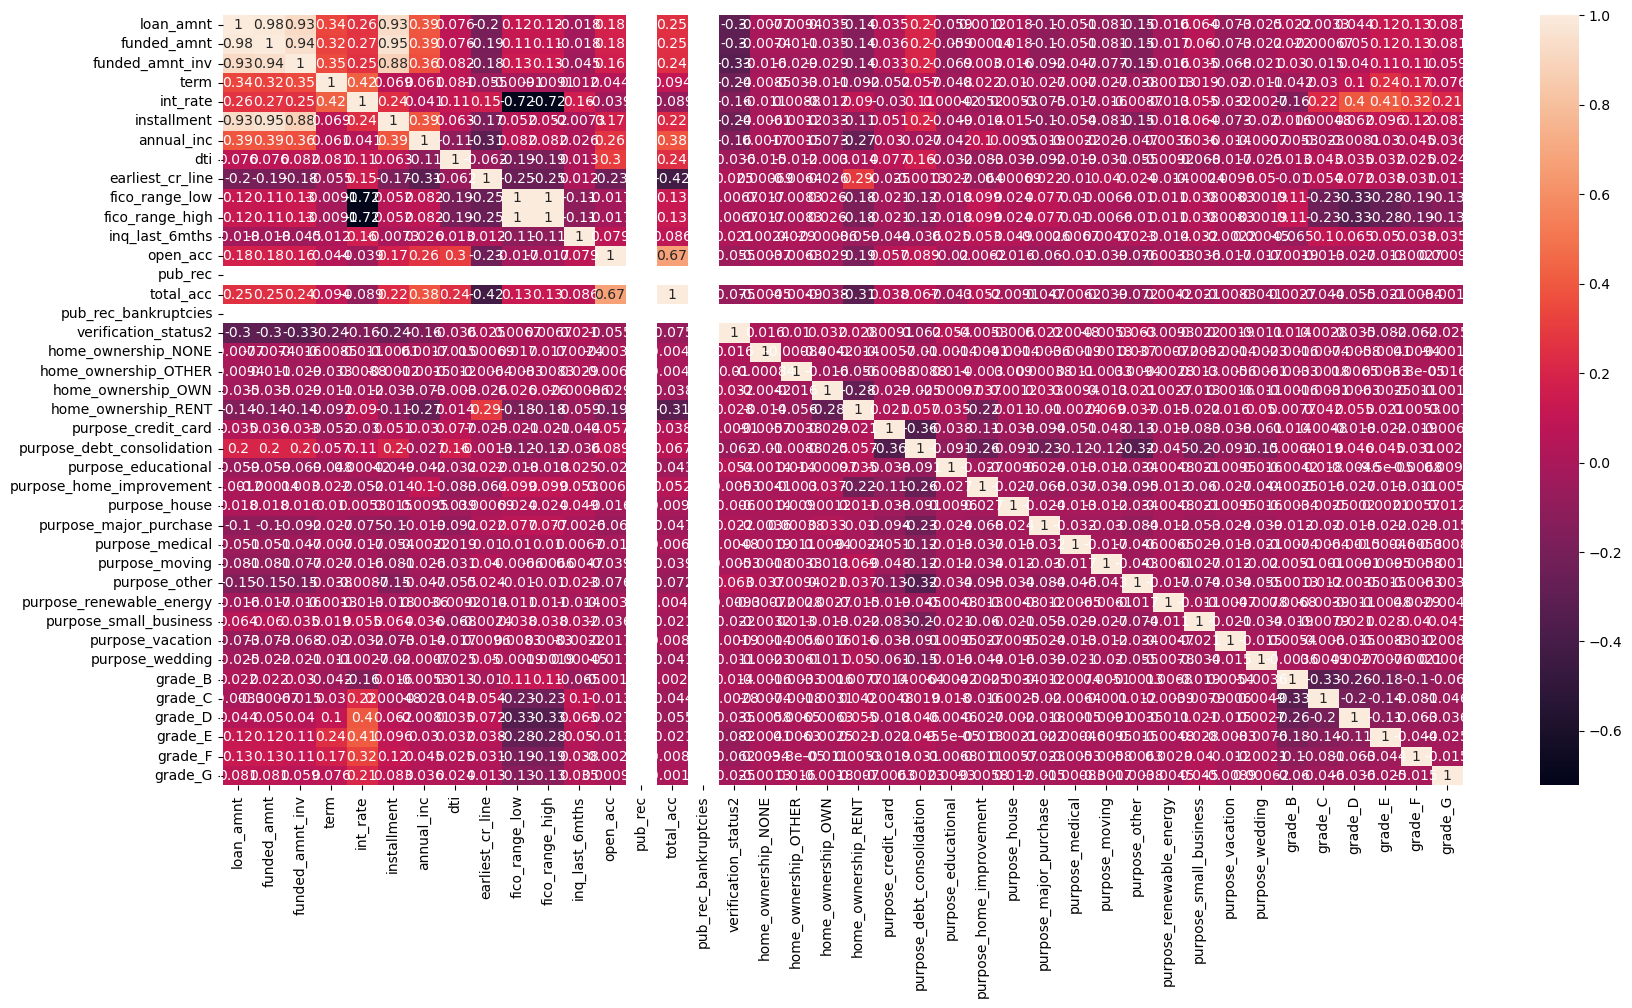

In [127]:
plt.figure(figsize = (20,10))       
sns.heatmap(X_scaled_df.corr(),annot = True)

In [128]:
from sklearn.decomposition import PCA
pca = PCA(random_state=42)
pca.fit(X_scaled)

PCA(random_state=42)

In [129]:
pca.components_[0]

array([ 4.29647860e-01,  4.31660911e-01,  4.19350810e-01,  1.76878304e-01,
        1.42405834e-01,  4.04990556e-01,  2.34120605e-01,  6.92350096e-02,
       -1.44644562e-01,  3.36166446e-02,  3.36166446e-02,  5.46259657e-03,
        1.56491773e-01, -6.46234854e-27,  1.98528843e-01, -3.78653235e-29,
       -1.72164186e-01, -6.53326540e-03, -6.37715092e-03, -1.67154758e-02,
       -1.14048126e-01,  1.43899520e-02,  1.16758188e-01, -4.05480554e-02,
        1.22590415e-02,  5.99492933e-03, -6.15281430e-02, -2.62224284e-02,
       -4.85717931e-02, -9.31253230e-02, -7.05479859e-03,  2.75410595e-02,
       -3.89424172e-02, -1.90771764e-02, -3.81938780e-03, -8.63632350e-03,
        2.76823684e-02,  7.46041876e-02,  7.43243077e-02,  4.57522170e-02])

In [130]:
pca.explained_variance_ratio_

array([1.27273858e-01, 9.12859755e-02, 5.19897898e-02, 4.28785833e-02,
       3.55916538e-02, 3.35617785e-02, 3.12290013e-02, 3.03440643e-02,
       2.96277905e-02, 2.89380466e-02, 2.80447553e-02, 2.75821198e-02,
       2.71787028e-02, 2.70546716e-02, 2.69371679e-02, 2.67645053e-02,
       2.66200412e-02, 2.64206743e-02, 2.63646240e-02, 2.60663249e-02,
       2.59875642e-02, 2.56966592e-02, 2.55768789e-02, 2.44908322e-02,
       2.28709324e-02, 2.14884671e-02, 2.02719125e-02, 1.77343910e-02,
       1.43896656e-02, 1.26661328e-02, 7.45061287e-03, 4.42052778e-03,
       2.27935979e-03, 1.36434227e-03, 7.48633626e-04, 6.15372284e-04,
       1.93587123e-04, 2.51003426e-32, 9.75280409e-34, 9.05111489e-34])

In [131]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
var_cumu

array([0.12727386, 0.21855983, 0.27054962, 0.31342821, 0.34901986,
       0.38258164, 0.41381064, 0.4441547 , 0.47378249, 0.50272054,
       0.5307653 , 0.55834742, 0.58552612, 0.61258079, 0.63951796,
       0.66628246, 0.69290251, 0.71932318, 0.7456878 , 0.77175413,
       0.79774169, 0.82343835, 0.84901523, 0.87350606, 0.896377  ,
       0.91786546, 0.93813737, 0.95587177, 0.97026143, 0.98292756,
       0.99037818, 0.9947987 , 0.99707806, 0.99844241, 0.99919104,
       0.99980641, 1.        , 1.        , 1.        , 1.        ])

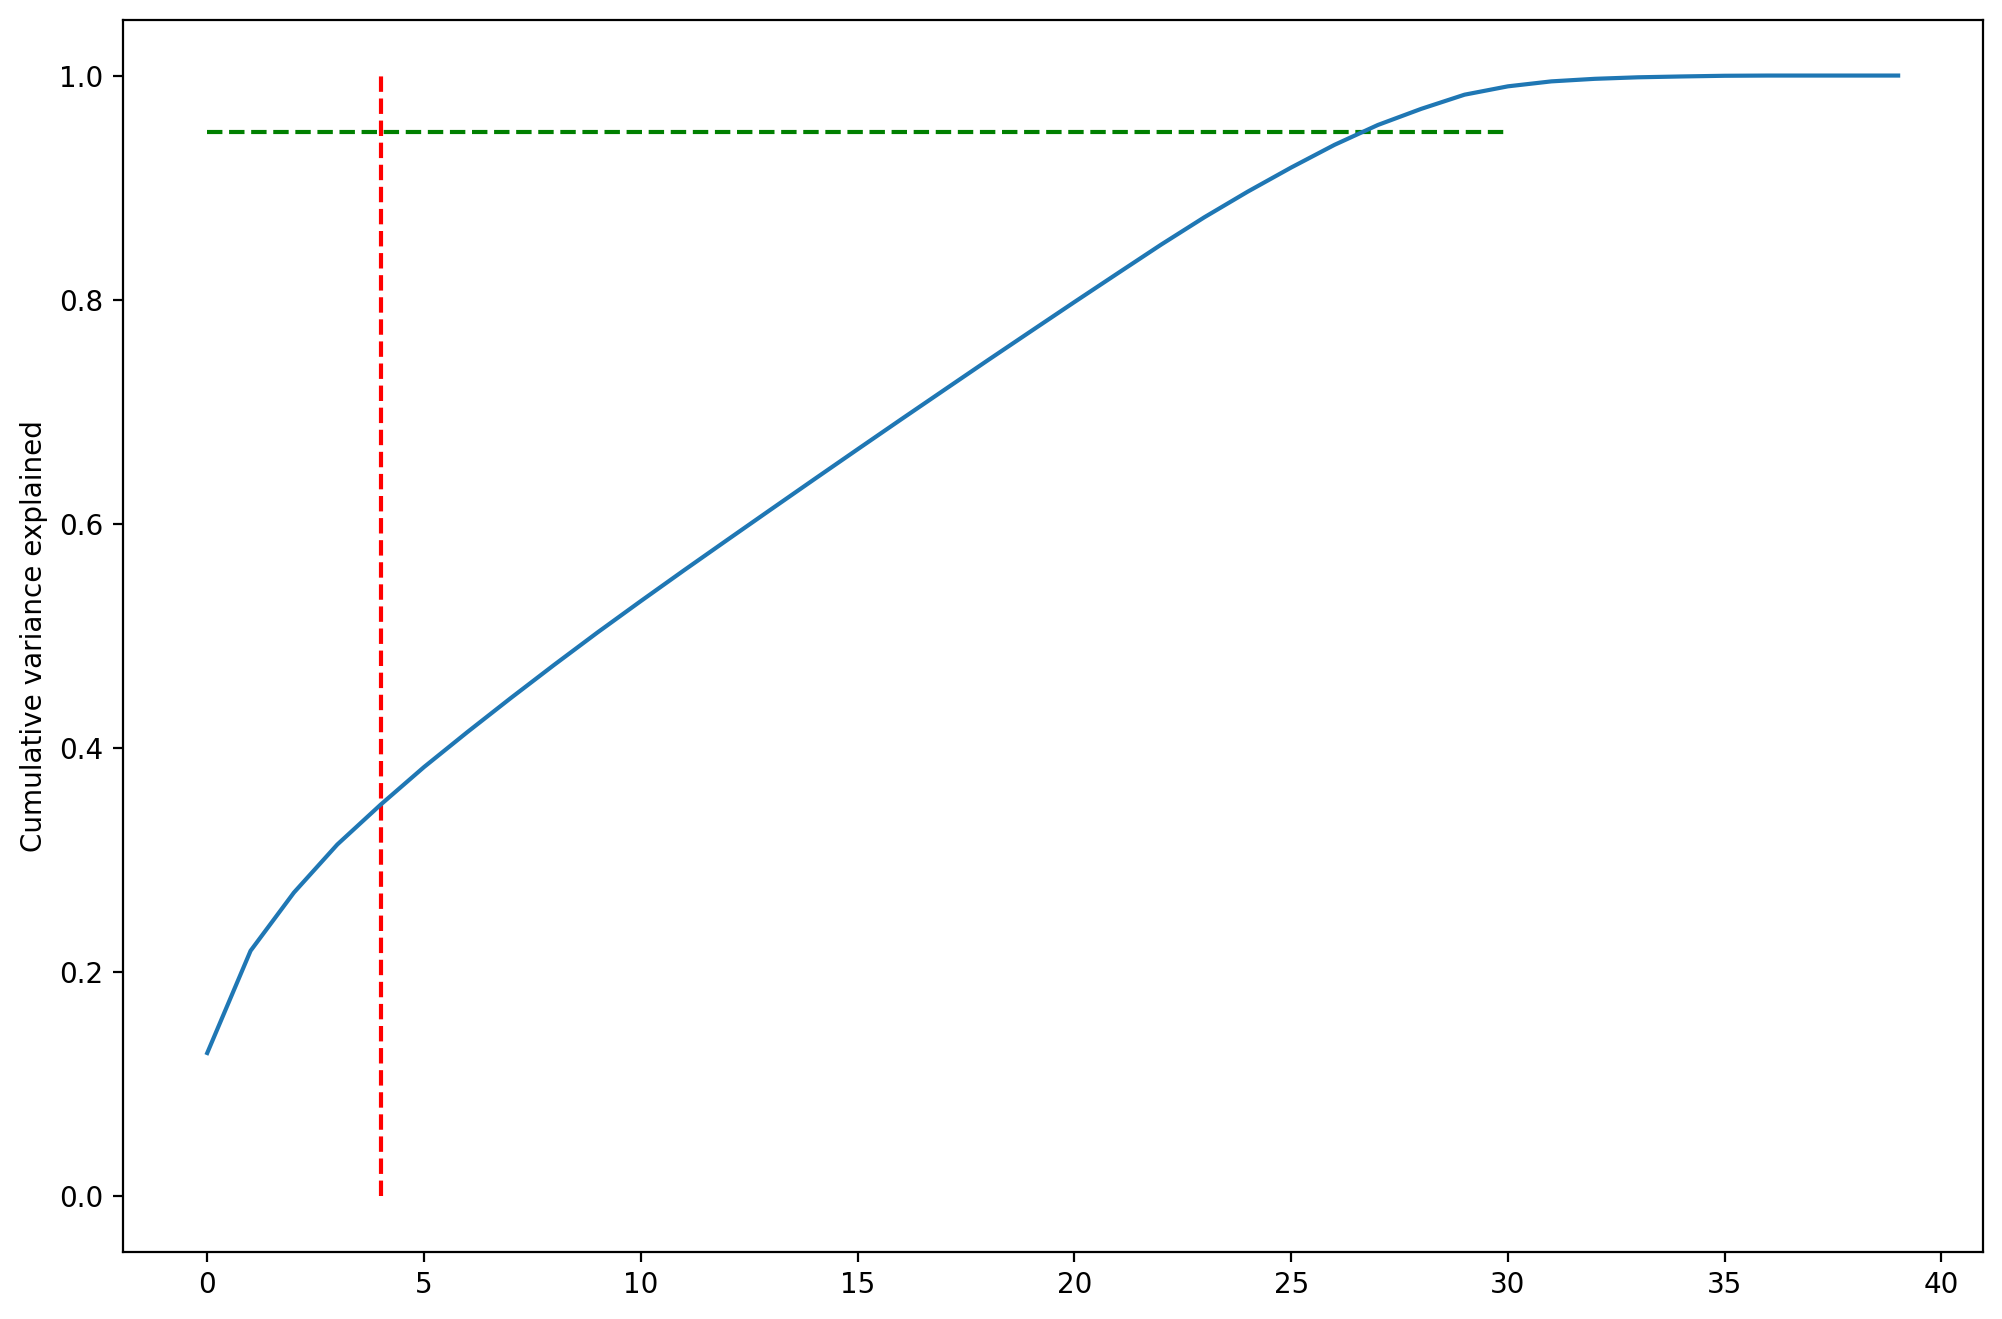

In [132]:
fig = plt.figure(figsize=[12,8],dpi=200)
plt.vlines(x=4, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [161]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=4)
X_pca_final = pca_final.fit_transform(X_scaled)

In [162]:
print(X.shape)
print(X_pca_final.shape)

(37152, 40)
(37152, 4)


In [163]:
corrmat = np.corrcoef(X_pca_final.transpose())

In [164]:
corrmat.shape

(4, 4)

<AxesSubplot:>

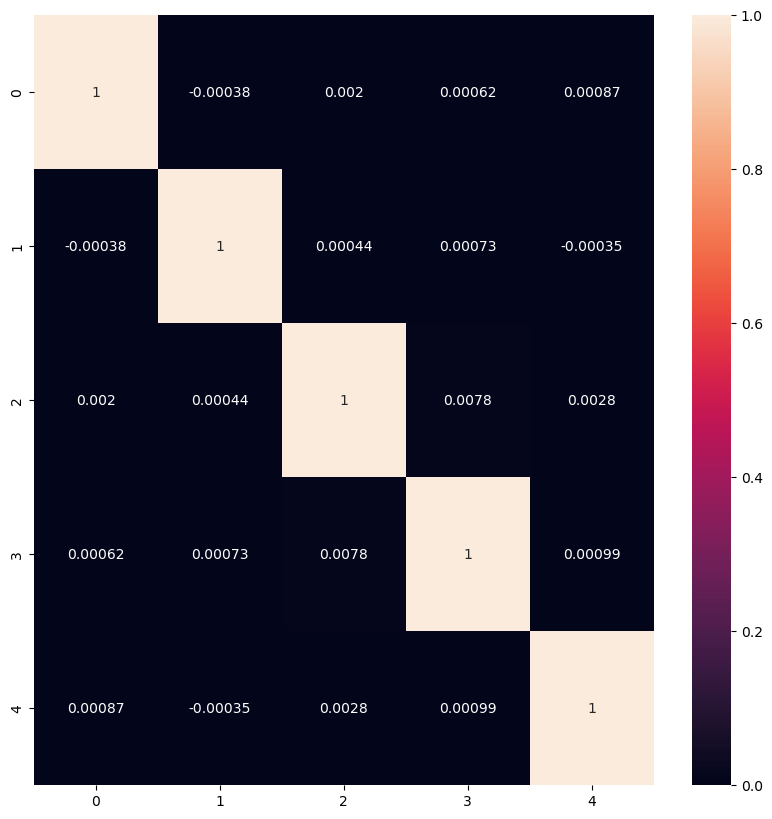

In [137]:
plt.figure(figsize=[10,10])
sns.heatmap(corrmat, annot=True)

In [138]:
colnames = list(X.columns)
pca_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pca_df.head()

,PC1,PC2,Feature
0,0.430,0.007,loan_amnt
1,0.432,0.003,funded_amnt
2,0.419,0.012,funded_amnt_inv
3,0.177,-0.116,term
4,0.142,-0.463,int_rate


In [139]:
pca_df

,PC1,PC2,Feature
0,0.430,0.007,loan_amnt
1,0.432,0.003,funded_amnt
2,0.419,0.012,funded_amnt_inv
3,0.177,-0.116,term
4,0.142,-0.463,int_rate
5,0.405,-0.005,installment
6,0.234,0.098,annual_inc
7,0.069,-0.100,dti
8,-0.145,-0.204,earliest_cr_line
9,0.034,0.485,fico_range_low


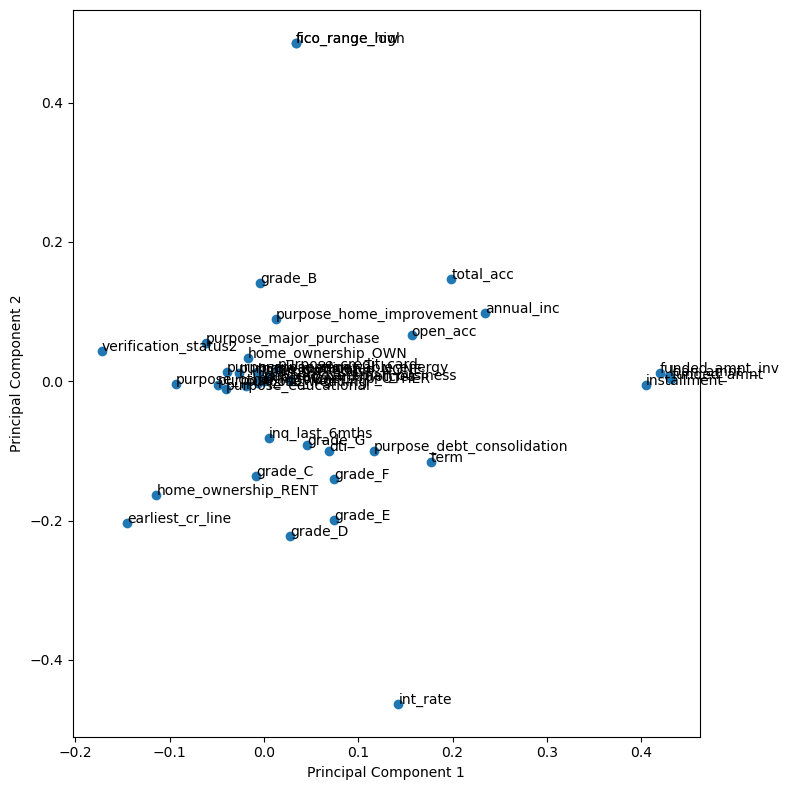

In [140]:
fig = plt.figure(figsize = (8,8))
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pca_df.Feature):
    plt.annotate(txt, (pca_df.PC1[i],pca_df.PC2[i]))
plt.tight_layout()
plt.show()

In [141]:
## Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [142]:
kmeans = KMeans(n_clusters=5, max_iter=1000)
kmeans.fit(X_pca_final)

KMeans(max_iter=1000, n_clusters=5)

In [143]:
kmeans.labels_

array([2, 0, 0, ..., 2, 1, 1])

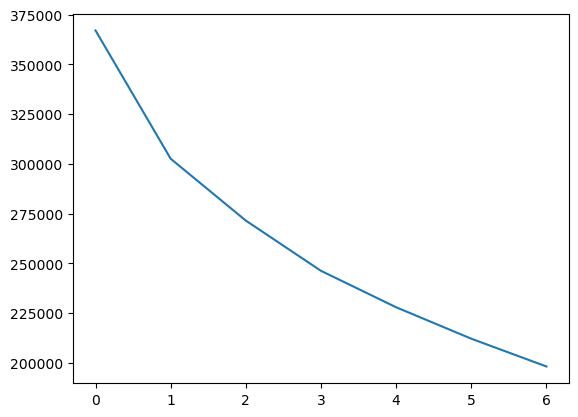

In [144]:
# metoda łokcia - elbow-curve
ssd = [] # Sum of squared distances
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=1000)
    kmeans.fit(X_pca_final)
    
    ssd.append(kmeans.inertia_) #Sum of squared distances
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

In [145]:
# Miara wewnętrzna - wskaźnik sylwetkowy
# średnią odległość pomiędzy obserwacjami wewnątrz grupy (a) i średnią odległość obserwacji do najbliższej „obcej” grupy (b). 
# Silhouette obliczany jest dla każdej obserwacji w następujący sposób: (a – b)/max(a, b)

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=1000)
    kmeans.fit(X_pca_final)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(X_pca_final, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.24658719539984808
For n_clusters=3, the silhouette score is 0.21354772129143906
For n_clusters=4, the silhouette score is 0.18477610215111698
For n_clusters=5, the silhouette score is 0.18469627089641022
For n_clusters=6, the silhouette score is 0.1854083501648016
For n_clusters=7, the silhouette score is 0.19369000913112586
For n_clusters=8, the silhouette score is 0.1905518872391655


In [146]:
kmeans = KMeans(n_clusters=3, max_iter=1000, random_state=42)
kmeans.fit(X_pca_final)

KMeans(max_iter=1000, n_clusters=3, random_state=42)

In [147]:
kmeans.labels_

array([1, 0, 0, ..., 1, 1, 1])

In [148]:
df_outliers_removed['K-Means_Cluster_ID'] = kmeans.labels_

In [149]:
df_outliers_removed.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,loan_status,dti,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,total_acc,pub_rec_bankruptcies,verification_status2,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,K-Means_Cluster_ID
0,5000.000,5000.000,4975.000,36.000,0.106,162.870,24000.000,1,27.650,1985.000,735.000,739.000,1.000,3.000,0.000,9.000,0.000,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,2500.000,2500.000,2500.000,60.000,0.153,59.830,30000.000,0,1.000,1999.000,740.000,744.000,5.000,3.000,0.000,4.000,0.000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2400.000,2400.000,2400.000,36.000,0.160,84.330,12252.000,1,8.720,2001.000,735.000,739.000,2.000,2.000,0.000,10.000,0.000,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,10000.000,10000.000,10000.000,36.000,0.135,339.310,49200.000,1,20.000,1996.000,690.000,694.000,1.000,10.000,0.000,37.000,0.000,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
4,3000.000,3000.000,3000.000,60.000,0.127,67.790,80000.000,1,17.940,1996.000,695.000,699.000,0.000,15.000,0.000,38.000,0.000,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1


In [150]:
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='K-Means_Cluster_ID', y='loan_amnt', data=df_outliers_removed)

ValueError: Could not interpret input 'gdpp'

<Figure size 1600x800 with 0 Axes>

In [ ]:
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='K-Means_Cluster_ID', y='int_rate', data=country_data_outliers_removed)

In [ ]:
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='K-Means_Cluster_ID', y='fico_range_high', data=country_data_outliers_removed)

In [151]:
X_scaled_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,total_acc,pub_rec_bankruptcies,verification_status2,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G
0,-0.843,-0.834,-0.743,-0.577,-0.347,-0.773,-1.134,2.129,-1.985,0.573,0.573,0.054,-1.475,0.000,-1.143,0.000,-0.899,-0.015,-0.057,-0.287,1.015,2.592,-0.932,-0.098,-0.277,-0.098,-0.244,-0.133,-0.124,-0.345,-0.049,-0.216,-0.097,-0.159,1.530,-0.505,-0.394,-0.276,-0.160,-0.092
1,-1.218,-1.222,-1.128,1.732,0.925,-1.317,-0.967,-1.840,0.291,0.711,0.711,3.502,-1.475,0.000,-1.608,0.000,-0.899,-0.015,-0.057,-0.287,1.015,-0.386,-0.932,-0.098,-0.277,-0.098,-0.244,-0.133,-0.124,-0.345,-0.049,-0.216,-0.097,-0.159,-0.654,1.982,-0.394,-0.276,-0.160,-0.092
2,-1.233,-1.238,-1.144,-0.577,1.115,-1.188,-1.463,-0.690,0.616,0.573,0.573,0.916,-1.720,0.000,-1.050,0.000,1.112,-0.015,-0.057,-0.287,1.015,-0.386,-0.932,-0.098,-0.277,-0.098,-0.244,-0.133,-0.124,-0.345,-0.049,4.636,-0.097,-0.159,-0.654,1.982,-0.394,-0.276,-0.160,-0.092
3,-0.091,-0.057,0.040,-0.577,0.435,0.158,-0.431,0.990,-0.197,-0.670,-0.670,0.054,0.238,0.000,1.461,0.000,-0.899,-0.015,-0.057,-0.287,1.015,-0.386,-0.932,-0.098,-0.277,-0.098,-0.244,-0.133,-0.124,2.901,-0.049,-0.216,-0.097,-0.159,-0.654,1.982,-0.394,-0.276,-0.160,-0.092
4,-1.143,-1.145,-1.050,1.732,0.215,-1.275,0.430,0.683,-0.197,-0.532,-0.532,-0.808,1.461,0.000,1.554,0.000,-0.899,-0.015,-0.057,-0.287,1.015,-0.386,-0.932,-0.098,-0.277,-0.098,-0.244,-0.133,-0.124,2.901,-0.049,-0.216,-0.097,-0.159,1.530,-0.505,-0.394,-0.276,-0.160,-0.092


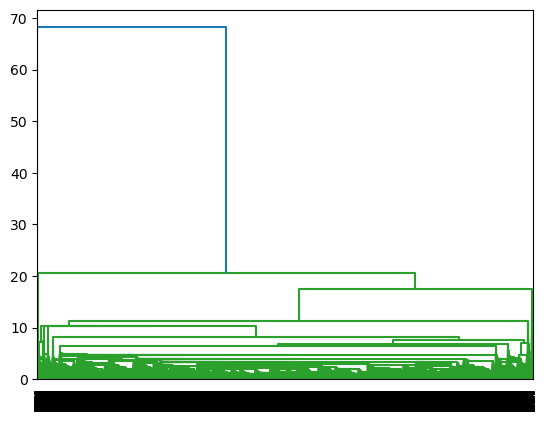

In [152]:
# single linkage
sl_mergings = linkage(X_scaled_df, method="single", metric='euclidean')
dendrogram(sl_mergings)
plt.show()

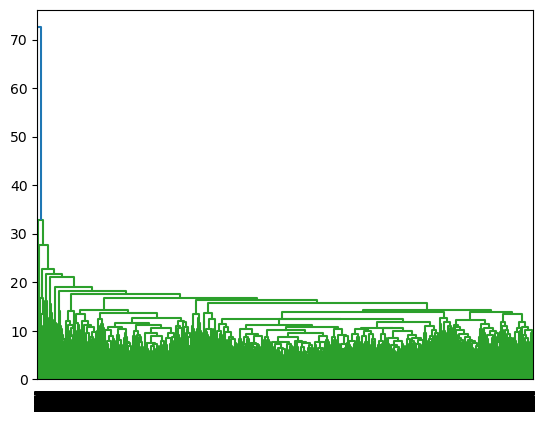

In [153]:
# complete linkage
cl_mergings = linkage(X_scaled_df, method="complete", metric='euclidean')
dendrogram(cl_mergings)
plt.show()

In [154]:
# 4 klastry z single linkge
sl_cluster_labels = cut_tree(sl_mergings, n_clusters=4).reshape(-1, )
sl_cluster_labels

array([0, 0, 0, ..., 0, 3, 0])

In [155]:
# 4 klastry z complete linkage
cl_cluster_labels = cut_tree(cl_mergings, n_clusters=4).reshape(-1, )
cl_cluster_labels

array([0, 0, 0, ..., 0, 3, 0])

In [158]:
df_outliers_removed["Hierarchical_Cluster_labels"] = cl_cluster_labels

In [157]:
df_outliers_removed.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,loan_status,dti,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,total_acc,pub_rec_bankruptcies,verification_status2,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,K-Means_Cluster_ID
0,5000.000,5000.000,4975.000,36.000,0.106,162.870,24000.000,1,27.650,1985.000,735.000,739.000,1.000,3.000,0.000,9.000,0.000,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,2500.000,2500.000,2500.000,60.000,0.153,59.830,30000.000,0,1.000,1999.000,740.000,744.000,5.000,3.000,0.000,4.000,0.000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2400.000,2400.000,2400.000,36.000,0.160,84.330,12252.000,1,8.720,2001.000,735.000,739.000,2.000,2.000,0.000,10.000,0.000,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,10000.000,10000.000,10000.000,36.000,0.135,339.310,49200.000,1,20.000,1996.000,690.000,694.000,1.000,10.000,0.000,37.000,0.000,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
4,3000.000,3000.000,3000.000,60.000,0.127,67.790,80000.000,1,17.940,1996.000,695.000,699.000,0.000,15.000,0.000,38.000,0.000,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1


In [165]:
X_pca_final_df = pd.DataFrame(X_pca_final,columns=['PC1','PC2','PC3','PC4'])

In [166]:
X_pca_final_df.head()

,PC1,PC2,PC3,PC4
0,-1.766,0.918,1.060,2.414
1,-2.475,-0.942,-0.883,-0.272
2,-3.109,-0.706,-0.273,0.412
3,-0.150,-1.018,-0.958,0.349
4,-1.340,-0.190,-1.133,0.006


In [167]:
X_pca_final_df['K_Means_Cluster_ID'] = kmeans.labels_
X_pca_final_df['Hierarchical_Cluster_Labels'] = cl_cluster_labels

In [168]:
X_pca_final_df.head()

,PC1,PC2,PC3,PC4,K_Means_Cluster_ID,Hierarchical_Cluster_Labels
0,-1.766,0.918,1.060,2.414,1,0
1,-2.475,-0.942,-0.883,-0.272,0,0
2,-3.109,-0.706,-0.273,0.412,0,0
3,-0.150,-1.018,-0.958,0.349,0,0
4,-1.340,-0.190,-1.133,0.006,1,0


In [169]:
# Standarize features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [172]:
clt = DBSCAN(eps=0.5, metric='euclidean', min_samples=5, n_jobs=-1)
model = clt.fit(X_std)

In [173]:
clt.labels_

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [174]:
X_std.shape

(37152, 40)

NameError: name 'c1' is not defined

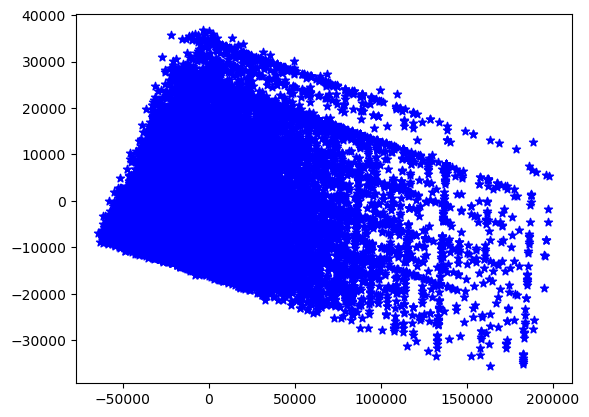

In [176]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(df_outliers_removed)
pca_2d = pca.transform(df_outliers_removed)
for i in range(0, pca_2d.shape[0]):
    if clt.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='r', marker='+')
    elif clt.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='g', marker='o')
    elif clt.labels_[i] == -1:
            c3 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='b', marker='*')
plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Noise'])
plt.title('DBSCAN finds 2 clusters and noise')
plt.show()